<a href="https://colab.research.google.com/github/Jalpapatel12/devnet-practice/blob/master/Linear_Regression_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
house_sales = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/house_sales_data.csv')

In [ ]:
house_sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


##### Data Manipulation

In [ ]:
house_sales.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
# Drop [id, date]
house_sales.drop(['id','date'], axis = 1, inplace = True)

##### Assuptions in Linear Regression

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


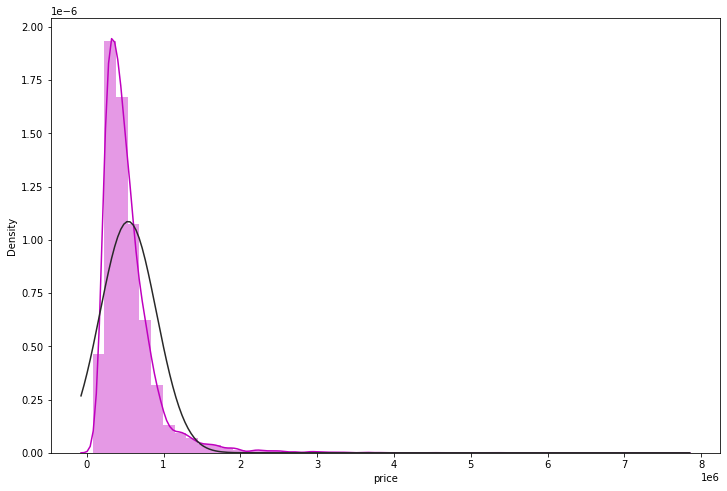

In [ ]:
from scipy.stats import norm
plt.figure(figsize = (12,8))
sns.distplot(house_sales['price'], color = 'm', fit = norm)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


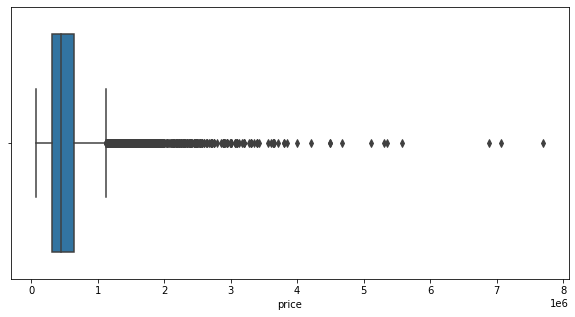

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(house_sales['price'])

##### Handling Outliers - z-score

In [ ]:
from scipy.stats import zscore
np.abs(zscore(house_sales))

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.866717,0.398737,1.447464,0.979835,0.228321,0.915427,0.087173,0.305759,0.629187,0.558836,0.734708,0.658681,0.544898,0.210128,1.870152,0.352572,0.306079,0.943355,0.260715
1,0.005688,0.398737,0.175607,0.533634,0.189885,0.936506,0.087173,0.305759,0.629187,0.558836,0.460841,0.245141,0.681079,4.746678,0.879568,1.161568,0.746341,0.432686,0.187868
2,0.980849,1.473959,1.447464,1.426254,0.123298,0.915427,0.087173,0.305759,0.629187,1.409587,1.229834,0.658681,1.293892,0.210128,0.933388,1.283537,0.135655,1.070140,0.172375
3,0.174090,0.676485,1.149449,0.130550,0.244014,0.915427,0.087173,0.305759,2.444294,0.558836,0.891699,1.397515,0.204446,0.210128,1.085160,0.283288,1.271816,0.914174,0.284522
4,0.081958,0.398737,0.149007,0.435422,0.169653,0.915427,0.087173,0.305759,0.629187,0.291916,0.130895,0.658681,0.544548,0.210128,0.073636,0.409550,1.199335,0.272190,0.192849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0.490545,0.398737,0.500221,0.598746,0.337424,2.788439,0.087173,0.305759,0.629187,0.291916,0.312039,0.658681,1.293542,0.210128,0.468382,1.004958,0.938069,0.666135,0.412381
21609,0.381588,0.676485,0.500221,0.250539,0.224386,0.936506,0.087173,0.305759,0.629187,0.291916,0.629908,0.658681,1.463768,0.210128,1.272063,0.356180,1.051685,0.228419,0.203946
21610,0.375865,1.473959,1.772078,1.154047,0.332137,0.936506,0.087173,0.305759,0.629187,0.558836,0.927928,0.658681,1.293542,0.210128,1.234683,0.247888,0.604321,1.410253,0.394141
21611,0.381588,0.398737,0.500221,0.522528,0.307076,0.936506,0.087173,0.305759,0.629187,0.291916,0.227505,0.658681,1.123316,0.210128,0.952078,0.184414,1.028910,0.841221,0.420511


In [ ]:
z = np.abs(zscore(house_sales))

In [ ]:
np.where(z > 4)

(array([    1,     5,    21, ..., 21576, 21576, 21576]),
 array([13, 17,  7, ...,  0,  6,  7]))

In [ ]:
len(np.where(z > 4)[0])

2528

In [ ]:
house_sales.shape

(21613, 19)

In [ ]:
house_df = house_sales.drop(np.where(z > 4)[0], axis = 0)

In [ ]:
house_df.shape

(19811, 19)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


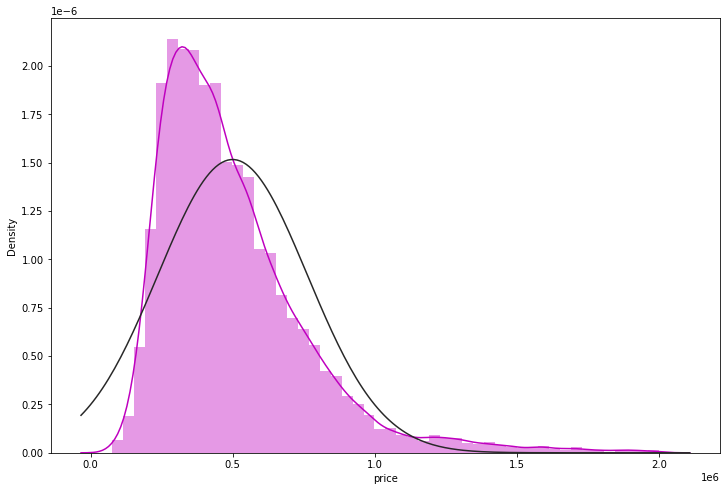

In [ ]:
from scipy.stats import norm
plt.figure(figsize = (12,8))
sns.distplot(house_df['price'], color = 'm', fit = norm)

##### Correlation Coefficient (-1,+1)
    * It is statistical concept which tells you the strength and direction of relationship between two numerical variables.

In [ ]:
house_df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.321286,0.481714,0.660276,0.105647,0.279860,NaN,0.269650,0.048557,0.667969,0.570948,0.245349,0.082016,NaN,-0.051302,0.392863,0.052420,0.585281,0.098728
bedrooms,0.321286,1.000000,0.510727,0.608286,0.090847,0.167300,NaN,0.064322,0.027448,0.355461,0.493195,0.286285,0.180255,NaN,-0.172308,-0.028594,0.161829,0.411443,0.093223
bathrooms,0.481714,0.510727,1.000000,0.730185,0.072335,0.512301,NaN,0.122469,-0.135104,0.639737,0.656148,0.225857,0.572693,NaN,-0.224431,0.007217,0.260446,0.556321,0.079813
sqft_living,0.660276,0.608286,0.730185,1.000000,0.226017,0.357483,NaN,0.203955,-0.066148,0.740311,0.863266,0.374239,0.367693,NaN,-0.219105,0.039630,0.280128,0.763875,0.230192
sqft_lot,0.105647,0.090847,0.072335,0.226017,1.000000,-0.078770,NaN,0.044459,0.024536,0.145014,0.219297,0.040153,0.036384,NaN,-0.179602,-0.069257,0.279318,0.251142,0.792672
floors,0.279860,0.167300,0.512301,0.357483,-0.078770,1.000000,NaN,-0.001011,-0.280868,0.467558,0.537070,-0.285958,0.532429,NaN,-0.068870,0.043249,0.140276,0.283205,-0.079748
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,0.269650,0.064322,0.122469,0.203955,0.044459,-0.001011,NaN,1.000000,0.035877,0.179625,0.095178,0.224939,-0.047142,NaN,0.087257,0.006220,-0.075801,0.216358,0.034759
condition,0.048557,0.027448,-0.135104,-0.066148,0.024536,-0.280868,NaN,0.035877,1.000000,-0.162404,-0.176069,0.193811,-0.391591,NaN,0.004355,-0.006739,-0.109646,-0.109399,0.035010
grade,0.667969,0.355461,0.639737,0.740311,0.145014,0.467558,NaN,0.179625,-0.162404,1.000000,0.737947,0.095424,0.488096,NaN,-0.196849,0.109172,0.223164,0.698923,0.159238


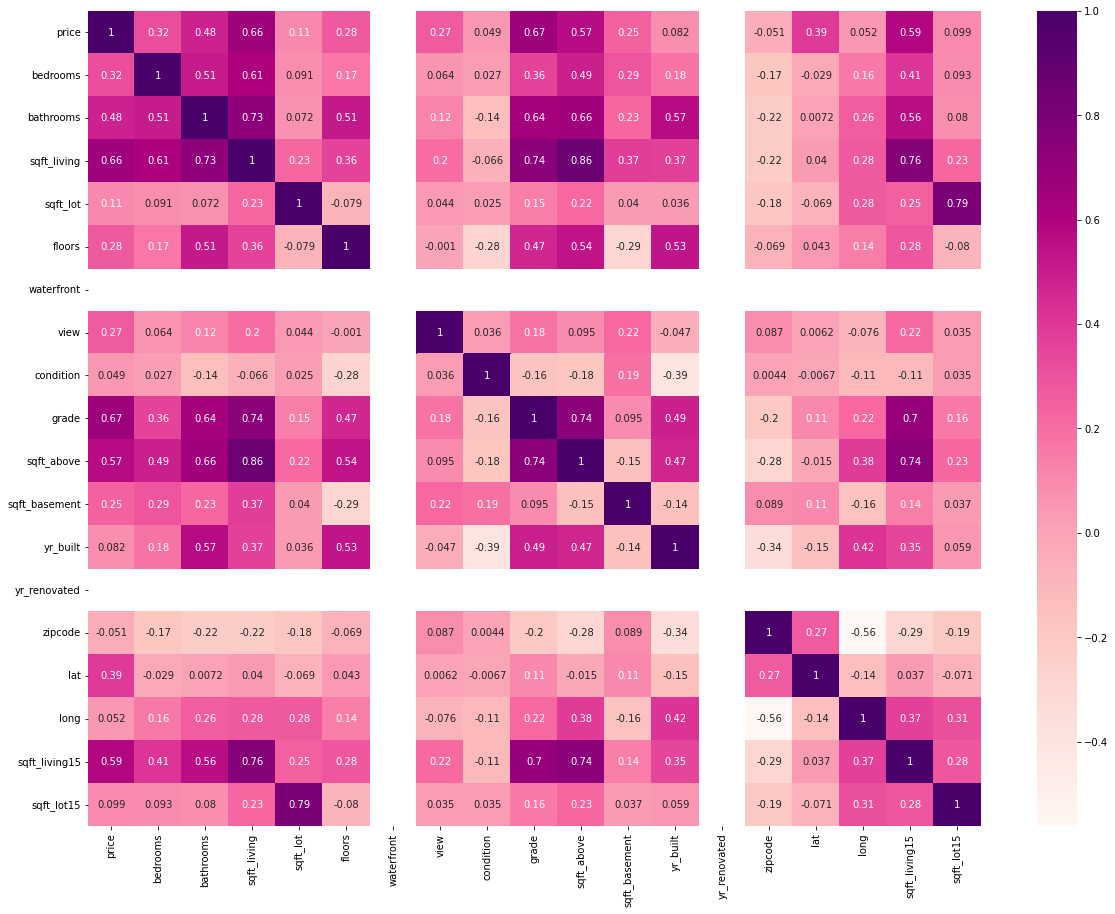

In [ ]:
plt.figure(figsize = (20,15))
sns.heatmap(house_df.corr(), annot = True, cmap = 'RdPu')

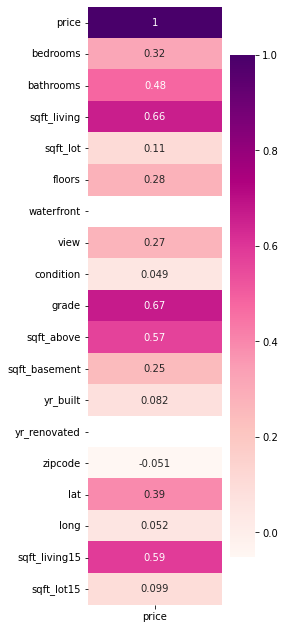

In [ ]:
plt.figure(figsize = (3,11))
sns.heatmap(house_df.corr()[['price']], annot = True, cmap = 'RdPu')

In [ ]:
house_df['waterfront'].min()

0

#### Split X & Y

In [ ]:
house_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
X = house_df.drop(['price','sqft_above','waterfront','condition','yr_renovated','long','sqft_lot15','zipcode'], axis = 1)
Y = house_df['price']

In [ ]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,sqft_basement,yr_built,lat,sqft_living15
0,3,1.00,1180,5650,1.0,0,7,0,1955,47.5112,1340
2,2,1.00,770,10000,1.0,0,6,0,1933,47.7379,2720
3,4,3.00,1960,5000,1.0,0,7,910,1965,47.5208,1360
4,3,2.00,1680,8080,1.0,0,8,0,1987,47.6168,1800
6,3,2.25,1715,6819,2.0,0,7,0,1995,47.3097,2238
...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,8,0,2009,47.6993,1530
21609,4,2.50,2310,5813,2.0,0,8,0,2014,47.5107,1830
21610,2,0.75,1020,1350,2.0,0,7,0,2009,47.5944,1020
21611,3,2.50,1600,2388,2.0,0,8,0,2004,47.5345,1410


##### Data Pre-Processing
    * Data Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [ ]:
# training
scaler.fit(X)

MinMaxScaler()

In [ ]:
scaled_X = scaler.transform(X)

In [ ]:
scaled_X

array([[0.42857143, 0.2       , 0.15140187, ..., 0.47826087, 0.55688623,
        0.20754717],
       [0.28571429, 0.2       , 0.07476636, ..., 0.28695652, 0.9339654 ,
        0.53301887],
       [0.57142857, 0.6       , 0.29719626, ..., 0.56521739, 0.57285429,
        0.21226415],
       ...,
       [0.28571429, 0.15      , 0.12149533, ..., 0.94782609, 0.69527611,
        0.13207547],
       [0.42857143, 0.5       , 0.22990654, ..., 0.90434783, 0.59564205,
        0.2240566 ],
       [0.28571429, 0.15      , 0.12149533, ..., 0.93913043, 0.69477711,
        0.13207547]])

##### Split into Train & Test - Cross Validation

In [ ]:
from sklearn.model_selection import train_test_split
# test_size = 0.2 (60-80% - training), (20-40% - Testing)
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, Y, test_size = 0.2, random_state = 0)

##### LR Algorithm

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression(normalize = True)

In [ ]:
# training of model using train dataset
lr_model.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [ ]:
# Score(0 - 1)
lr_model.score(X_test, Y_test)

0.7045460664781261

#### Regression Metrics

In [ ]:
yhat = lr_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# r2_score = Coeff. of Determination
r2_score(Y_test, yhat)

0.7045460664781261

In [ ]:
# MSE
mean_squared_error(Y_test, yhat)

19417876297.92542

In [ ]:
# RMSE
np.sqrt(mean_squared_error(Y_test, yhat))

139348.0401653551

In [ ]:
# MAE
mean_absolute_error(Y_test,yhat)

98822.57329285613

In [ ]:
Y_test.mean()

496102.3626040878

#### Coeff. & Intercepts

In [ ]:
lr_model.coef_

array([-111904.00425284,  186394.09720531,  588954.39473389,
        -60367.05041776,   55638.0396333 ,  125970.84873794,
        837462.39421324,  -22151.18892664, -303597.49139672,
        324488.78719234,  159023.82490696])

In [ ]:
# beta0
lr_model.intercept_

-213975.5653910435

##### Making New Predictions

In [ ]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,sqft_basement,yr_built,lat,sqft_living15
0,3,1.00,1180,5650,1.0,0,7,0,1955,47.5112,1340
2,2,1.00,770,10000,1.0,0,6,0,1933,47.7379,2720
3,4,3.00,1960,5000,1.0,0,7,910,1965,47.5208,1360
4,3,2.00,1680,8080,1.0,0,8,0,1987,47.6168,1800
6,3,2.25,1715,6819,2.0,0,7,0,1995,47.3097,2238
...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,8,0,2009,47.6993,1530
21609,4,2.50,2310,5813,2.0,0,8,0,2014,47.5107,1830
21610,2,0.75,1020,1350,2.0,0,7,0,2009,47.5944,1020
21611,3,2.50,1600,2388,2.0,0,8,0,2004,47.5345,1410


In [ ]:
X_new = [[4,	2.00,	2180,	8650,	1.0,	0,	7,	0,	2009,	47.5212,	2340]]

In [ ]:
Xscaled_new = scaler.transform(X_new)
Xscaled_new

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.57142857, 0.4       , 0.33831776, 0.04589668, 0.        ,
        0.        , 0.44444444, 0.        , 0.94782609, 0.57351963,
        0.44339623]])

In [ ]:
np.round(lr_model.predict(Xscaled_new))

array([334179.])